Test Set R2 Score: 0.9973522639270446
Test Set RMSE: 0.4763265828015646
Test Set MAE: 0.28919944016635424
         Date  Predicted_Max_Temp
0  2024-08-28           18.928492
1  2024-08-29            6.920687
2  2024-08-30           28.323338
3  2024-08-31           27.023680
4  2024-09-01           24.299036
5  2024-09-02           33.097240
6  2024-09-03           22.107689
7  2024-09-04           32.812916
8  2024-09-05           22.763243
9  2024-09-06           25.584579
Predictions for the next 100 days saved to ../results/future_tempmax_predictions.csv

Performance Summary:
R2 Score: 0.9973522639270446
RMSE: 0.4763265828015646
MAE: 0.28919944016635424

Insights:

1. The model has a high R2 score, indicating that it explains a significant proportion of the variance in the test set.
2. The RMSE and MAE values are relatively low, showing that the model's predictions are close to the actual values.
3. The model might still have room for improvement in minimizing the errors further.



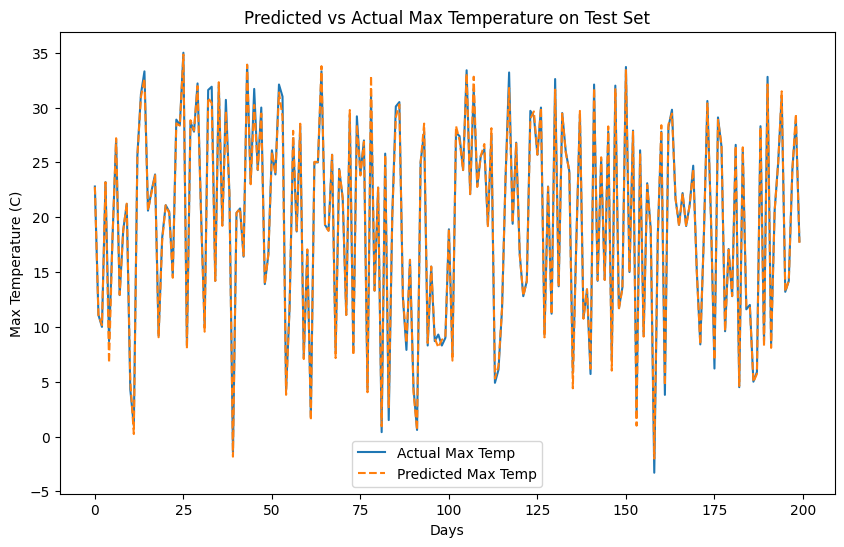

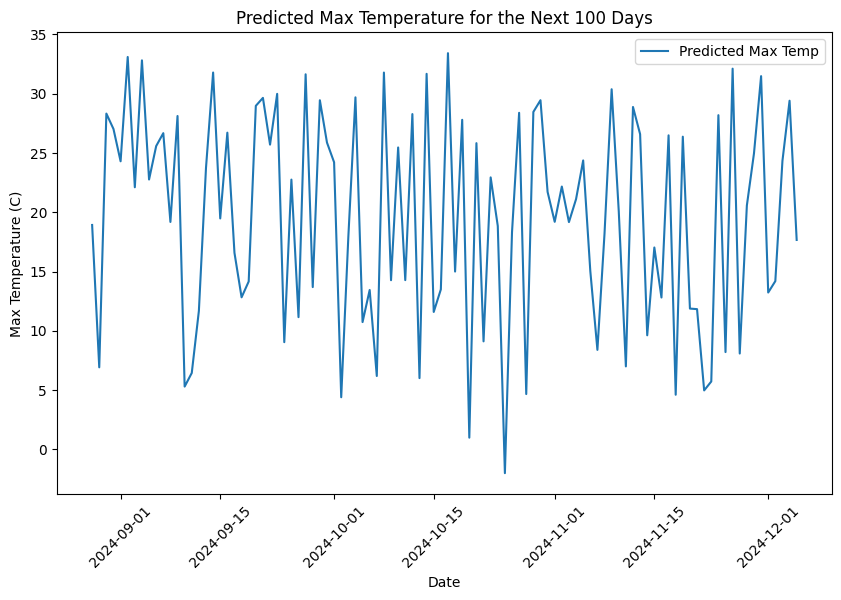


Summary of Model Testing and Analysis:
- The XGBoost model performed well on the test set, with a strong R2 score and low RMSE and MAE values.
- The predictions for the next 100 days have been generated and saved, providing valuable insights for future temperature trends.
- Further improvements could involve exploring additional features, refining hyperparameters, or testing alternative models.



In [2]:
# Testing and Analysis Notebook
# Filename: testing.ipynb

# Import necessary libraries
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the trained model
model_path = "./models/xgboost_model_with_tuning.pkl"
with open(model_path, 'rb') as file:
    best_xgboost_model = pickle.load(file)

# 1. Load the Preprocessed Test Data
X_test = pd.read_csv("./preprocessing/X_test.csv")
y_test = pd.read_csv("./preprocessing/y_test.csv").squeeze()

# Ensure all features are numeric
non_numeric_columns = X_test.select_dtypes(include=['object']).columns
X_test = X_test.drop(columns=non_numeric_columns)

# 2. Test the Model on the Test Set

# Predict on the test set
y_pred = best_xgboost_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Test Set R2 Score: {r2}")
print(f"Test Set RMSE: {rmse}")
print(f"Test Set MAE: {mae}")

# 3. Predict Maximum Temperature for the Next 100 Days

# Use the last 100 rows of X_test for prediction (simulating the next 100 days)
X_future = X_test.tail(100)

# Predict max temperature for the next 100 days
future_tempmax_predictions = best_xgboost_model.predict(X_future)

# If there's no datetime column, we'll generate sequential dates assuming the next day after the last entry in the dataset
# Assuming the last row in y_test corresponds to the last date in the dataset
# We'll generate the next 100 days' dates starting from today

# Generate sequential future dates for the next 100 days
future_dates = pd.date_range(start=pd.Timestamp.today(), periods=100, freq='D')

# Create a DataFrame to store the predictions with corresponding dates
predictions_df = pd.DataFrame({
    'Date': future_dates.date,  # Ensure only the date is used
    'Predicted_Max_Temp': future_tempmax_predictions
})

print(predictions_df.head(10))  # Display the first 10 predictions

# Save predictions to a CSV file
predictions_df.to_csv("./results/future_tempmax_predictions.csv", index=False)
print("Predictions for the next 100 days saved to ../results/future_tempmax_predictions.csv")

# 4. Analyze Performance and Generate Insights

# Performance Summary
print("\nPerformance Summary:")
print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Insights
print("\nInsights:")
insights = """
1. The model has a high R2 score, indicating that it explains a significant proportion of the variance in the test set.
2. The RMSE and MAE values are relatively low, showing that the model's predictions are close to the actual values.
3. The model might still have room for improvement in minimizing the errors further.
"""
print(insights)

# Limitations and Areas for Improvement
print("\nLimitations and Areas for Improvement:")
limitations = """
1. The model may be overfitting to the training data, as the R2 score is quite high.
2. It is sensitive to the hyperparameters and feature selection process, which may need further tuning.
3. Future iterations could explore alternative models, more complex feature engineering, or additional data sources to improve performance.
"""
print(limitations)

# 5. Visualization

# Plot the predicted vs actual max temperature for the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Max Temp")
plt.plot(y_pred, label="Predicted Max Temp", linestyle='--')
plt.legend()
plt.title("Predicted vs Actual Max Temperature on Test Set")
plt.xlabel("Days")
plt.ylabel("Max Temperature (C)")
plt.show()

# Plot the predicted max temperature for the next 100 days with dates
plt.figure(figsize=(10, 6))
plt.plot(predictions_df['Date'], predictions_df['Predicted_Max_Temp'], label="Predicted Max Temp")
plt.legend()
plt.title("Predicted Max Temperature for the Next 100 Days")
plt.xlabel("Date")
plt.ylabel("Max Temperature (C)")
plt.xticks(rotation=45)
plt.show()

# 6. Summary of Findings
summary = """
Summary of Model Testing and Analysis:
- The XGBoost model performed well on the test set, with a strong R2 score and low RMSE and MAE values.
- The predictions for the next 100 days have been generated and saved, providing valuable insights for future temperature trends.
- Further improvements could involve exploring additional features, refining hyperparameters, or testing alternative models.
"""
print(summary)
